In [0]:
from google.colab import files

In [0]:
dataset=files.upload()

Saving dataset.csv to dataset.csv


In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
import matplotlib.pyplot as plt

In [88]:
data=pd.read_csv("dataset.csv")
data.head()

,196,195,195.1,198,197,200,210,193,146,102,...,130.6,144.7,141.7,63.3,53.7,49.1,51.3,65.2,64.3,1
0,195,196,198,198,197,194,196,206,202,184,...,141,148,141,65,53,56,61,51,58,2
1,198,199,198,197,197,202,213,200,167,114,...,139,135,149,102,50,56,50,60,70,3
2,16,38,57,54,63,71,74,84,97,91,...,65,59,45,61,70,61,64,60,58,4
3,10,22,41,48,51,51,59,73,76,79,...,119,103,90,81,76,53,30,33,36,5
4,91,91,91,88,70,66,76,91,108,132,...,80,70,68,70,72,67,72,91,112,4


In [89]:
Y=data["1"]
Y=np.array(Y)
X=data.drop(["1"],axis=1)
X=X/255
X=X.astype('float32')
X=np.array(X)
train_X,test_X,train_Y,test_Y = train_test_split(X, Y, test_size=0.3, random_state=12)
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((9581, 28, 28, 1), (4107, 28, 28, 1))

In [90]:
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 4
After conversion to one-hot: [0. 0. 0. 0. 1. 0. 0. 0.]


In [91]:
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((7664, 28, 28, 1), (1917, 28, 28, 1), (7664, 8), (1917, 8))

In [0]:
batch_size = 64
epochs = 20
num_classes = 8

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))           
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [95]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 64)          0         
__________

In [96]:
train= model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Train on 7664 samples, validate on 1917 samples
Epoch 1/20
7664/7664 [==============================] - 3s 368us/step - loss: 1.0674 - acc: 0.4842 - val_loss: 1.0300 - val_acc: 0.4945
Epoch 2/20
7664/7664 [==============================] - 2s 295us/step - loss: 0.9726 - acc: 0.5812 - val_loss: 0.8071 - val_acc: 0.7240
Epoch 3/20
7664/7664 [==============================] - 2s 290us/step - loss: 0.7824 - acc: 0.7133 - val_loss: 0.6853 - val_acc: 0.7762
Epoch 4/20
7664/7664 [==============================] - 2s 281us/step - loss: 0.6856 - acc: 0.7608 - val_loss: 0.6041 - val_acc: 0.7945
Epoch 5/20
7664/7664 [==============================] - 2s 271us/step - loss: 0.6331 - acc: 0.7792 - val_loss: 0.5559 - val_acc: 0.8206
Epoch 6/20
7664/7664 [==============================] - 2s 278us/step - loss: 0.5898 - acc: 0.7955 - val_loss: 0.5408 - val_acc: 0.8211
Epoch 7/20
7664/7664 [==============================] - 2s 276us/step - loss: 0.5596 - acc: 0.8086 - val_loss: 0.5147 - val_acc: 0.8299


In [0]:
model.save("Fac_Reg.h5py")

In [98]:
test_eval = model.evaluate(test_X, test_Y_one_hot, verbose=1)

4107/4107 [==============================] - 0s 108us/step


In [99]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.5459326974864362
Test accuracy: 0.830046262464182


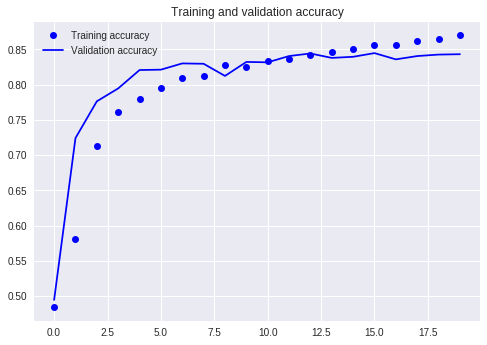

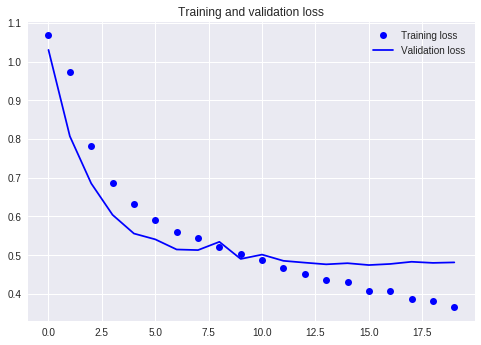

In [100]:
accuracy = train.history['acc']
val_accuracy = train.history['val_acc']
loss = train.history['loss']
val_loss = train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
predicted_classes = model.predict(test_X)

In [0]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [103]:
predicted_classes.shape, test_Y.shape

((4107,), (4107,))

Found 3363 correct labels


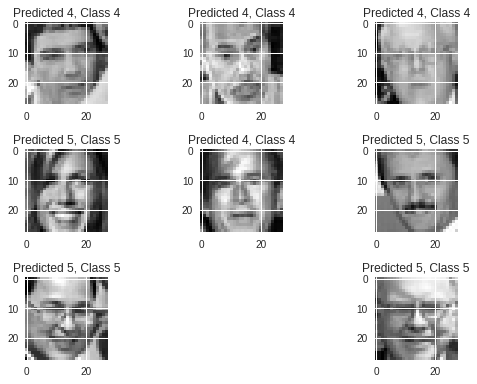

In [104]:
correct = np.where(predicted_classes==test_Y)[0]
print ("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

Found 744 incorrect labels


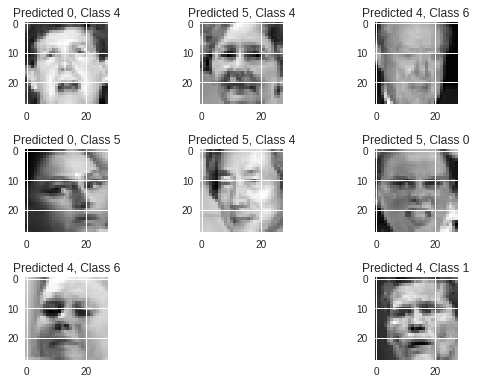

In [105]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print ("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
    plt.tight_layout()
